In [ ]:
## Importanting the Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# ignore warning
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Importing the Dataset
data=pd.read_csv('heart_cleveland_upload.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
data.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

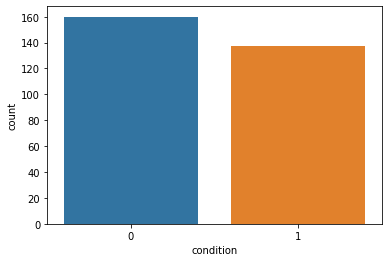

In [ ]:
import seaborn as sns
sns.countplot(x='condition', data=data)
plt.show()

In [ ]:

# Renaming some of the columns 
data = data.rename(columns={'condition':'target'})

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
data['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

In [ ]:
# Let's check if there is any Null value using isnull() method
data.isnull().values.any()

False

In [ ]:
# lets find unique values in dataset using nunique() method. it exclude NA values by default.
data.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

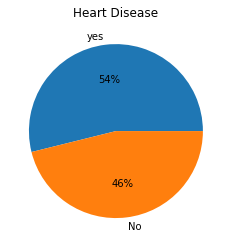

In [ ]:

# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = data['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

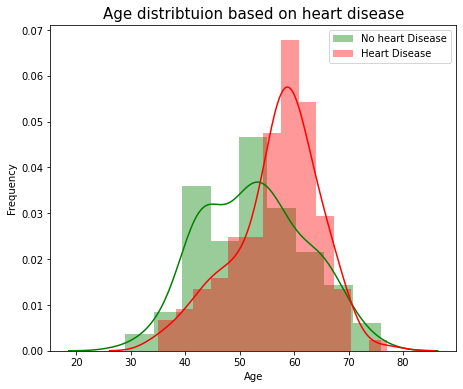

In [ ]:

fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.distplot(data[data['target'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(data[data['target'] == 1]["age"], color='red',label='Heart Disease') #Red for heart disease
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()

In [ ]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(data[data['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(data[data['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', data[data['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.64375


In [ ]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(data[data['target'] == 1]['age']))
print('Max age of people who do not have heart disease: ', max(data[data['target'] == 1]['age']))
print('Average age of people who do not have heart disease: ', data[data['target'] == 1]['age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.75912408759124


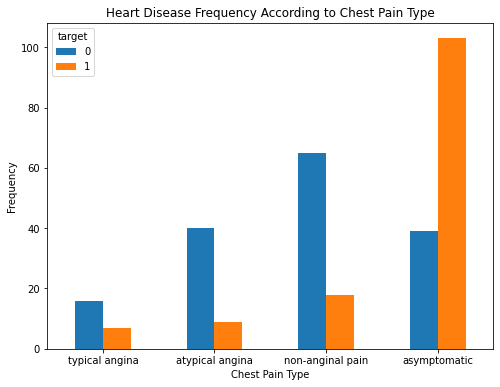

In [ ]:

pd.crosstab(data.cp,data.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Outlier detection

In [ ]:
import seaborn as sns

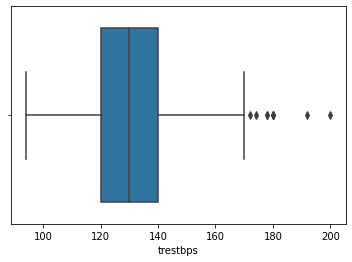

In [ ]:
sns.boxplot(data['trestbps'])

In [ ]:
#Finding the IQR
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age         13.0
sex          1.0
cp           1.0
trestbps    20.0
chol        65.0
fbs          0.0
restecg      2.0
thalach     33.0
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         2.0
target       1.0
dtype: float64


In [ ]:
# The code will give information where False means values are valid whereas True indicates presence of an outlier.

print(data < (Q1 - (1.5 * IQR)) |(data > (Q3 + 1.5 * IQR)))

       age    sex     cp  trestbps   chol  ...  oldpeak  slope     ca   thal  target
0    False  False   True     False  False  ...     True  False  False   True    True
1    False   True   True     False  False  ...    False   True  False   True    True
2    False   True   True     False  False  ...    False  False   True   True    True
3    False  False   True     False  False  ...    False  False  False   True   False
4    False  False   True     False  False  ...    False  False   True   True    True
..     ...    ...    ...       ...    ...  ...      ...    ...    ...    ...     ...
292  False  False  False     False  False  ...     True   True   True  False   False
293  False  False  False     False  False  ...    False  False   True  False   False
294  False  False  False     False  False  ...    False  False   True  False   False
295  False   True  False     False  False  ...    False   True   True   True    True
296  False  False  False     False  False  ...     True   True   

In [ ]:
#outlier removal
#Using IQR 

data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
23,74,0,1,120,269,0,2,121,1,0.2,0,1,0,0
24,71,0,1,160,302,0,0,162,0,0.4,0,2,0,0
25,70,1,1,156,245,0,2,143,0,0.0,0,0,0,0
27,63,0,1,140,195,0,0,179,0,0.0,0,2,0,0
28,62,1,1,120,281,0,2,103,0,1.4,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


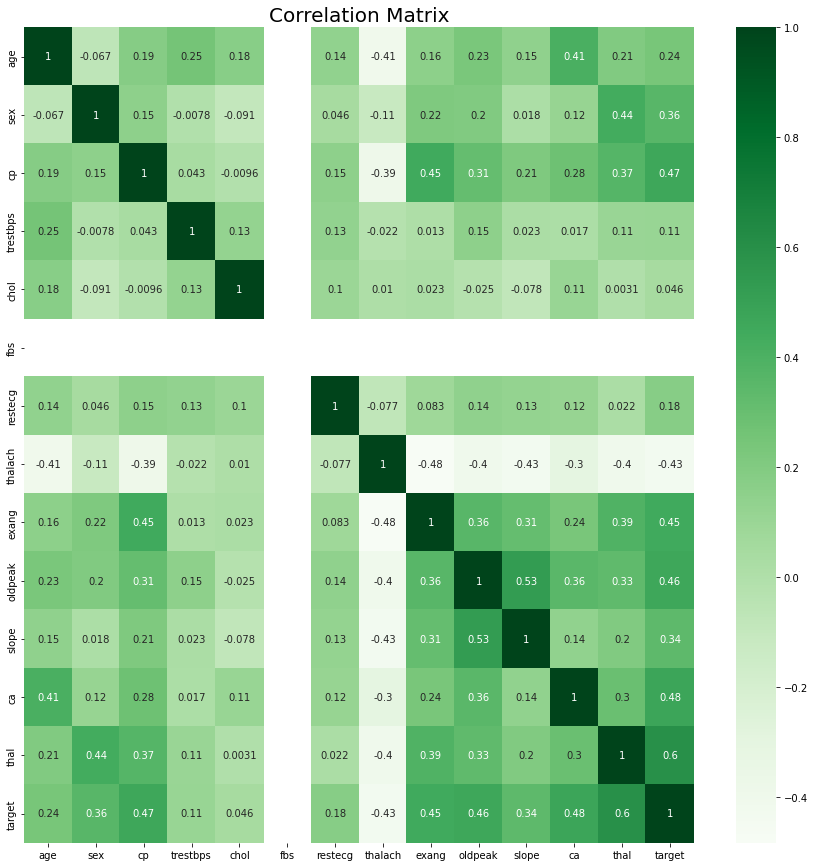

In [ ]:
# Correlation map
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(data_cleared_iqr.corr(), annot = True, cmap = "Greens")
plt.show()

In [ ]:
#fixing our data in x and y. Here y contains target data and X contains rest all the features.
x= data_cleared_iqr.drop(columns= 'target')
y= data_cleared_iqr.target

# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (159, 13), X_test size: (53, 13)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#feature scaling
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBOOST":XGBClassifier()
}

In [ ]:
for key,classifier in classifiers.items():
  classifier.fit(x_train_scaler,y_train)
  training_score=cross_val_score(classifier,x_train,y_train,cv=10)
  print("Classfiers:",classifier.__class__.__name__,"has a training score ",round(training_score.mean(),2)*100)

Classfiers: LogisticRegression has a training score  84.0
Classfiers: KNeighborsClassifier has a training score  56.99999999999999
Classfiers: SVC has a training score  59.0
Classfiers: DecisionTreeClassifier has a training score  76.0
Classfiers: RandomForestClassifier has a training score  84.0
Classfiers: XGBClassifier has a training score  84.0


In [ ]:
#creating Logistic Regression Model
LR_model= LogisticRegression(penalty='l2', C=1.0,solver='newton-cg')
LR_model.fit(x_train_scaler, y_train)
y_pred_LR= LR_model.predict(x_test_scaler)
LR_model.score(x_test_scaler,y_test)

0.8490566037735849

In [ ]:

print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_LR)*100),2)))

cm = confusion_matrix(y_test, y_pred_LR)
print(cm)

#Creating a pickle file for the classifier
filename = 'heart-disease-prediction-model.pkl'
pickle.dump(LR_model, open(filename, 'wb'))

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.83      0.83      0.83        23

    accuracy                           0.85        53
   macro avg       0.85      0.85      0.85        53
weighted avg       0.85      0.85      0.85        53

Accuracy: 84.91%

[[26  4]
 [ 4 19]]
